# Step 1: Installation and Setup

**Insatalling Tensor Flow**





In [1]:
pip install Tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.15.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

**Importing the Dataset**

In [5]:
from tensorflow.keras.datasets import cifar10

**Loading the dataset**

In [6]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [7]:
class_names =['0:airplane', '1:automobile','2:bird','3:cat','4: deer','5;dog','6:frog','7:horse','8:ship','9:truck']

In [8]:
print(class_names)

['0:airplane', '1:automobile', '2:bird', '3:cat', '4: deer', '5;dog', '6:frog', '7:horse', '8:ship', '9:truck']


In [9]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [10]:
y_train.max(), y_train.min()

(9, 0)

In [11]:
class_names

['0:airplane',
 '1:automobile',
 '2:bird',
 '3:cat',
 '4: deer',
 '5;dog',
 '6:frog',
 '7:horse',
 '8:ship',
 '9:truck']

**Normalizing the images**

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0

In [13]:
x_train.max(),x_train.min(),x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [14]:
x_train.shape,x_test.shape

## 5000 traing data and 10000 test data, image dimension:32*32

((50000, 32, 32, 3), (10000, 32, 32, 3))

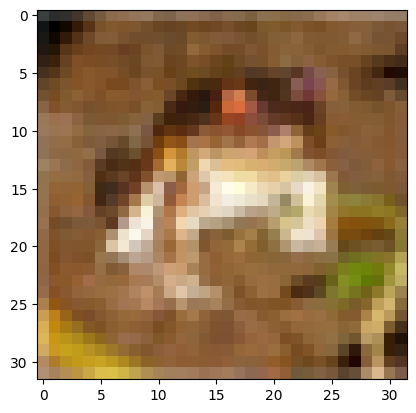

In [15]:
plt.imshow(x_train[0])

In [16]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
class_names

['0:airplane',
 '1:automobile',
 '2:bird',
 '3:cat',
 '4: deer',
 '5;dog',
 '6:frog',
 '7:horse',
 '8:ship',
 '9:truck']

In [ ]:
## The above image is a frog

# Building the CNN Model

**Define an object**

In [17]:
model =tf.keras.models.Sequential()

**Adding first CNN layer**
1. filters(kernel) =32
2. kernel size=3
3. padding =same
4. activation function =ReLU
5. Input shape =(32,32,3)

In [18]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same', activation='relu',input_shape=[32,32,3]))

**Adding second CNN layer and maxpool layer**
* filters(kernel) =32
* kernel size=3
* padding =same
* activation function =ReLU



In [20]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same', activation='relu'))

## maxpool layer parameters
## 1) pool size -2
#3 2) strides =2
## 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

**Adding Third CNN layer**
* filters(kernel) =64
* kernel size=3
* padding =same
* activation function =ReLU

In [21]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same', activation='relu'))


**Adding fourth CNN layer and maxpool layer**
* filters(kernel) =64
* kernel size=3
* padding =same
* activation function =ReLU

In [22]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same', activation='relu'))

## maxpool layer parameters
## 1) pool size -2
#3 2) strides =2
## 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

**Adding dropout layer**

In [23]:
model.add(tf.keras.layers.Dropout(0.4))

In [24]:
## Adding the flattenning layer
## We are converting the array into vectors

model.add(tf.keras.layers.Flatten())

In [25]:
## Adding first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [26]:
## Adding second dense layer(output layer)
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          1

# Step 4: Training the model

In [28]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics='sparse_categorical_accuracy')


In [29]:
## train the model
model.fit(x_train,y_train, batch_size=10,epochs=10)

Epoch 1/10
5000/5000 [==============================] - 30s 5ms/step - loss: 1.5974 - sparse_categorical_accuracy: 0.4092
Epoch 2/10
5000/5000 [==============================] - 23s 5ms/step - loss: 1.1810 - sparse_categorical_accuracy: 0.5761
Epoch 3/10
5000/5000 [==============================] - 23s 5ms/step - loss: 1.0140 - sparse_categorical_accuracy: 0.6413
Epoch 4/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.9188 - sparse_categorical_accuracy: 0.6755
Epoch 5/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.8608 - sparse_categorical_accuracy: 0.6964
Epoch 6/10
5000/5000 [==============================] - 24s 5ms/step - loss: 0.8203 - sparse_categorical_accuracy: 0.7120
Epoch 7/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.7830 - sparse_categorical_accuracy: 0.7243
Epoch 8/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.7612 - sparse_categorical_accuracy: 0.7333
Epoch 9/10
5000/5000 [==

# Model Evaluation and Prediction

In [30]:
# evaluate model performance
test_loss, test_acc =model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.7690 - sparse_categorical_accuracy: 0.7405


In [33]:
print('Test Accuracy :{} '.format(test_acc))

Test Accuracy :0.7404999732971191 


In [35]:
## Predictions



# Get raw predictions from the model
y_prob = model.predict(x_test)

# Get the class with the highest probability
y_pred = np.argmax(y_prob, axis=1)  # Gets the index of the highest probability


313/313 [==============================] - 1s 2ms/step


In [36]:
print(y_pred[10]), print(y_test[10])

0
[0]


(None, None)

In [37]:
print(y_pred[100]), print(y_test[100]) ## wrong prediction

7
[4]


(None, None)

**Confusion Matrix**

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm =confusion_matrix(y_test, y_pred)

In [39]:
print(cm)

[[815  12  40  21   7   6   4   6  58  31]
 [ 13 865   1   7   2   5   8   3  40  56]
 [ 85   4 605  57 102  56  50  21  16   4]
 [ 26   7  71 553  52 160  68  23  29  11]
 [ 27   1  54  70 716  18  46  54  10   4]
 [ 14   4  52 176  41 634  26  39   8   6]
 [  7   2  49  76  39  14 795   5  10   3]
 [ 16   0  42  62  61  58   8 735   4  14]
 [ 63  24  11  12   3   5   2   4 862  14]
 [ 27  74  10  12   3   5   4   5  35 825]]


In [40]:
## diagonal values are the right predicted values and all other values are wrong predicted values

In [41]:
## predict the value based on the confusion matrix

acc_cm = accuracy_score(y_test,y_pred)
print(acc_cm)

0.7405
